In [1]:
import pandas as pd

In [43]:
df = pd.read_csv("datasets/ext_5.csv")

df['External temperature (Celsius degree)'] = df['External temperature (Celsius degree)'].astype(float)

df['Date and time'] = pd.to_datetime(df['Date and time'])

In [44]:
df.set_index('Date and time', inplace=True)

In [45]:
daily_mean = df.resample('D').mean()

In [46]:
means = daily_mean.mean(axis=0)
stds = daily_mean.std(axis=0)

normalized_data = (daily_mean - means) / stds

In [47]:
normalized_data.to_csv('datasets/ext_day_mean_norm_5.csv', index=False)

In [48]:
df = pd.read_csv('datasets/ext_day_mean_std.csv')

new_data = pd.DataFrame({'id': 5, 'mean': means, 'std': stds})

df_mean_var = pd.concat([df, new_data], ignore_index=True)
df_mean_var.to_csv('datasets/ext_day_mean_std.csv', index=False)

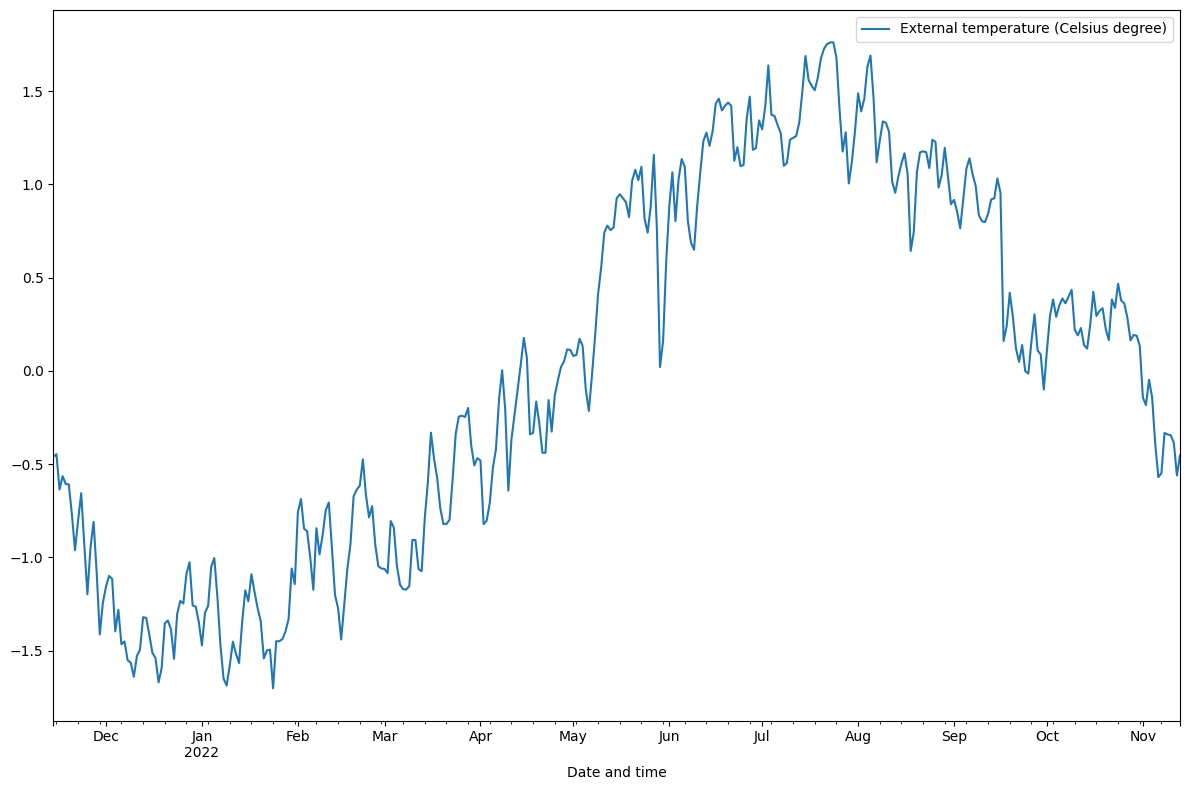

In [11]:
import matplotlib.pyplot as plt

# Plot the last 4 columns
normalized_data.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()